In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [26]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [27]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [28]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [29]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


In [30]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [31]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [32]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [33]:
print(f"na values: {species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [34]:
print(f"number of parks: {observations.park_name.nunique()}")
print(f"unique parks: {observations.park_name.unique()}")

number of parks: 4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [35]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


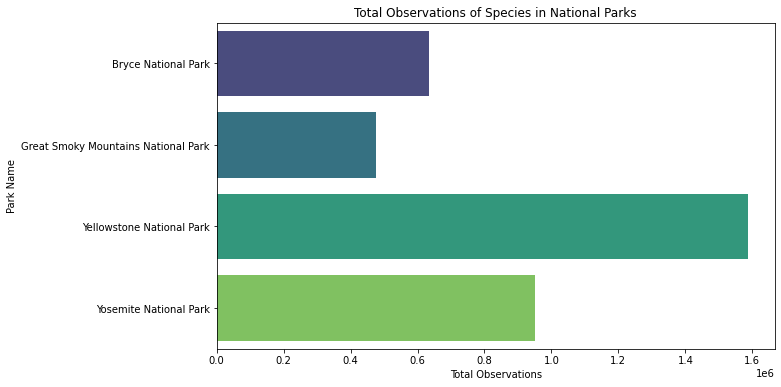

In [36]:
# Merge species and observations data to analyze species observations in parks
species_park_observations = pd.merge(species, observations, on='scientific_name')

# Group by park_name to get total observations and unique species count per park
observations_per_park = species_park_observations.groupby('park_name').agg({
    'observations': 'sum',
    'scientific_name': 'nunique'
}).reset_index()

observations_per_park.columns = ['Park Name', 'Total Observations', 'Unique Species Count']

# Plotting observations per park
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Observations', y='Park Name', data=observations_per_park, palette='viridis')
plt.title('Total Observations of Species in National Parks')
plt.xlabel('Total Observations')
plt.ylabel('Park Name')
plt.show()


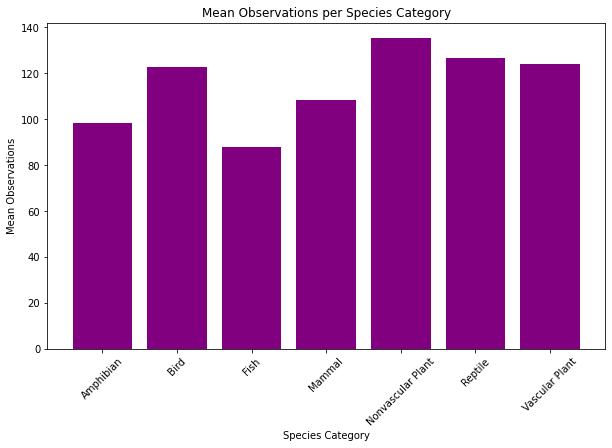

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(mean_observations_per_category['category'], mean_observations_per_category['observations'], color='purple')
plt.xlabel('Species Category')
plt.ylabel('Mean Observations')
plt.title('Mean Observations per Species Category')
plt.xticks(rotation=45)
plt.show()


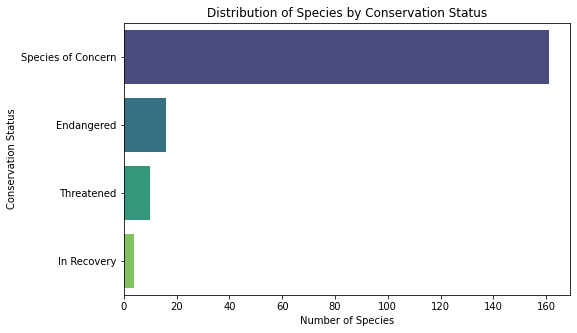

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(y='conservation_status', data=species, palette='viridis')
plt.title('Distribution of Species by Conservation Status')
plt.xlabel('Number of Species')
plt.ylabel('Conservation Status')
plt.show()


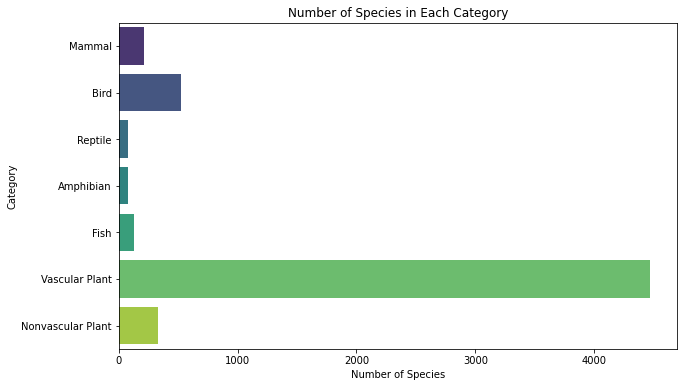

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=species, palette='viridis')
plt.title('Number of Species in Each Category')
plt.xlabel('Number of Species')
plt.ylabel('Category')
plt.show()


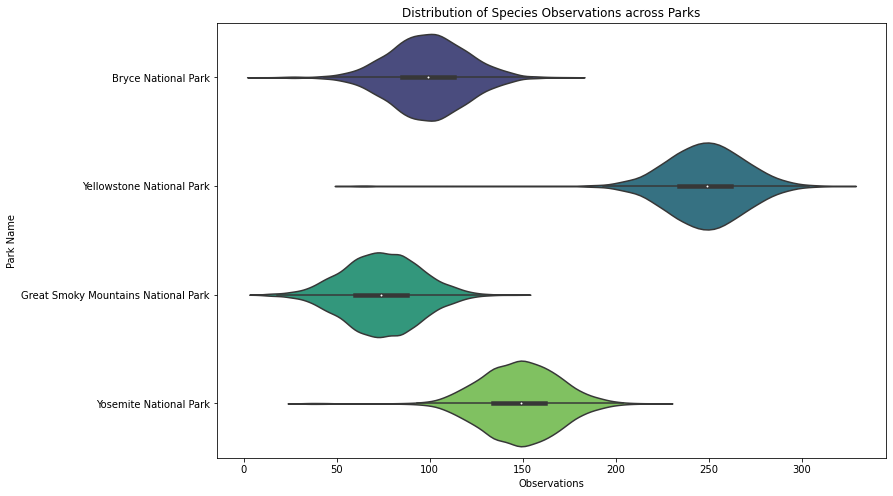

In [42]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='observations', y='park_name', data=species_park_observations, palette='viridis')
plt.title('Distribution of Species Observations across Parks')
plt.xlabel('Observations')
plt.ylabel('Park Name')
plt.show()


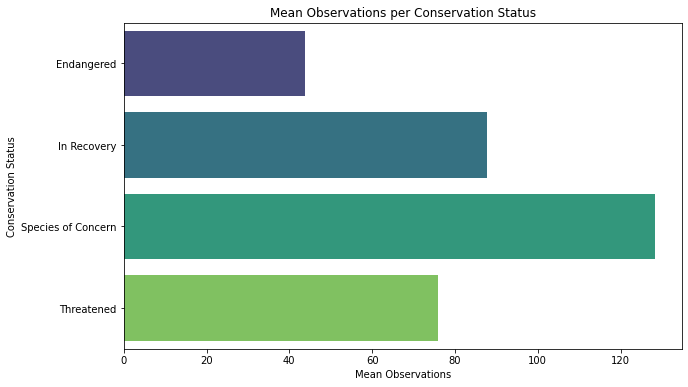

In [43]:
mean_observations_per_status = species_park_observations.groupby('conservation_status')['observations'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='observations', y='conservation_status', data=mean_observations_per_status, palette='viridis')
plt.title('Mean Observations per Conservation Status')
plt.xlabel('Mean Observations')
plt.ylabel('Conservation Status')
plt.show()


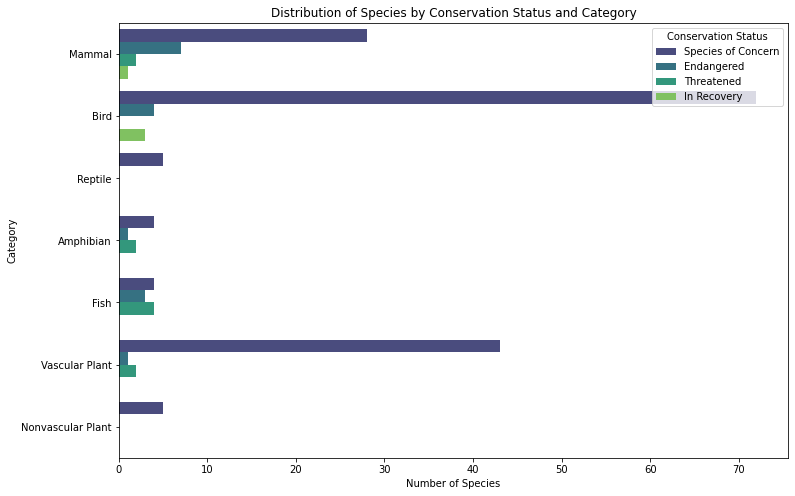

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(y='category', hue='conservation_status', data=species, palette='viridis')
plt.title('Distribution of Species by Conservation Status and Category')
plt.xlabel('Number of Species')
plt.ylabel('Category')
plt.legend(title='Conservation Status')
plt.show()


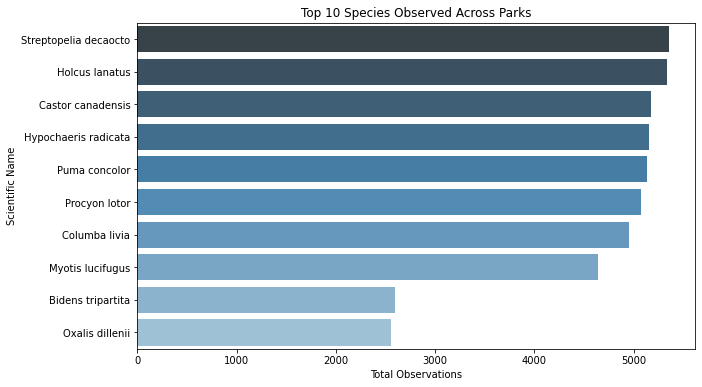

In [45]:
top_species_observed = species_park_observations.groupby('scientific_name')['observations'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='observations', y='scientific_name', data=top_species_observed, palette='Blues_d')
plt.title('Top 10 Species Observed Across Parks')
plt.xlabel('Total Observations')
plt.ylabel('Scientific Name')
plt.show()
